## front-back normalization

In [1]:
TFile *ipf = new TFile("data_16C.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");
TF1 *fup[3], *flow[3];
TString f1name;
for(int i=0;i<3;i++) {
    f1name.Form("fup%d",i);
    fup[i]=new TF1(f1name,"[0]+[1]*x",0,8000);
    f1name.Form("flow%d",i);
    flow[i]=new TF1(f1name,"[0]+[1]*x",0,8000);    
}

## Make a cut for a selected DSSD

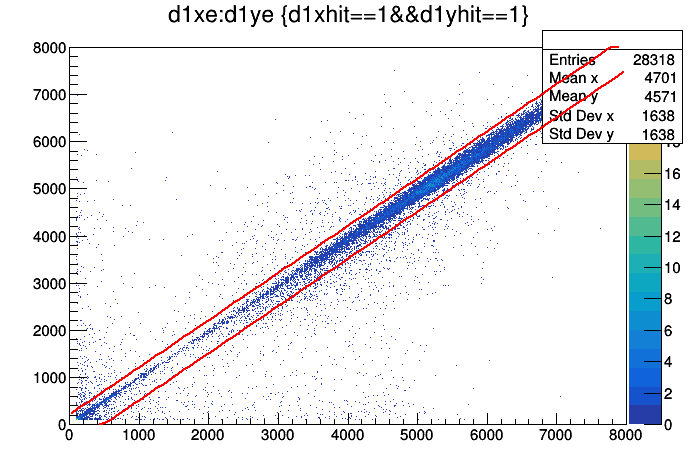

In [2]:
tree->Draw("d1xe:d1ye>>(1000,0,8000,1000,0,8000)","d1xhit==1&&d1yhit==1","colz");
fup[0]->SetParameters(200,1);
flow[0]->SetParameters(-500,1);
fup[0]->Draw("same");
flow[0]->Draw("same");
c1->Draw();

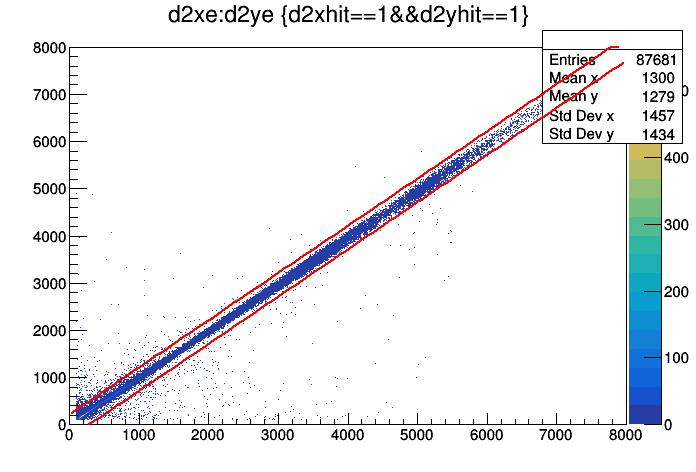

In [3]:
tree->Draw("d2xe:d2ye>>(1000,0,8000,1000,0,8000)","d2xhit==1&&d2yhit==1","colz");
fup[1]->SetParameters(200,1);
flow[1]->SetParameters(-300,1);
fup[1]->Draw("same");
flow[1]->Draw("same");
c1->Draw();

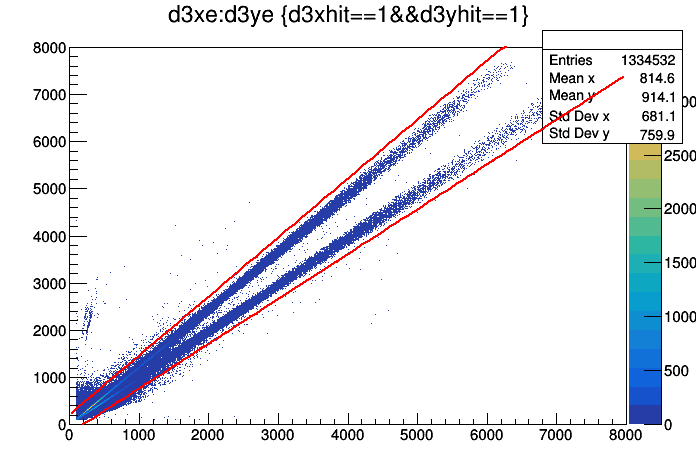

In [4]:
tree->Draw("d3xe:d3ye>>(1000,0,8000,1000,0,8000)","d3xhit==1&&d3yhit==1","colz");
fup[2]->SetParameters(200,1.25);
flow[2]->SetParameters(-200,0.95);
fup[2]->Draw("same");
flow[2]->Draw("same");
c1->Draw();
float kup[3], klow[3], cup[3], clow[3];
for(int i=0;i<3;i++) {
    kup[i]=fup[i]->GetParameter(1);
    cup[i]=fup[i]->GetParameter(0); 
    klow[i]=flow[i]->GetParameter(1);
    clow[i]=flow[i]->GetParameter(0);   
}

int xsmax[3],ysmax[3];//x/y strip number with maximum counts

## x-y hit map

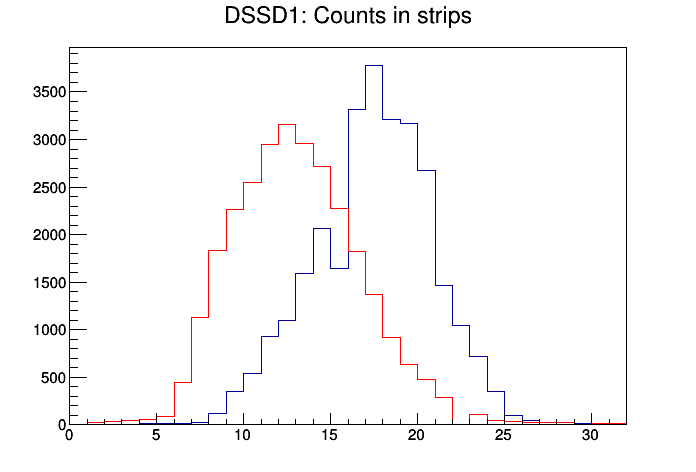

18 13


In [5]:

THStack *hs1 = new THStack("hs1","DSSD1: Counts in strips");
tree->Draw("d1xs>>h1xs(32,0,32)","d1xhit==1 && d1yhit==1");
tree->Draw("d1ys>>h1ys(32,0,32)","d1xhit==1 && d1yhit==1");
h1ys->SetLineColor(2);
hs1->Add(h1xs);
hs1->Add(h1ys);
xsmax[0]=h1xs->GetMaximumBin();
ysmax[0]=h1ys->GetMaximumBin();
cout<<xsmax[0]<<" "<<ysmax[0]<<endl;
hs1->Draw("nostack");
c1->Draw();

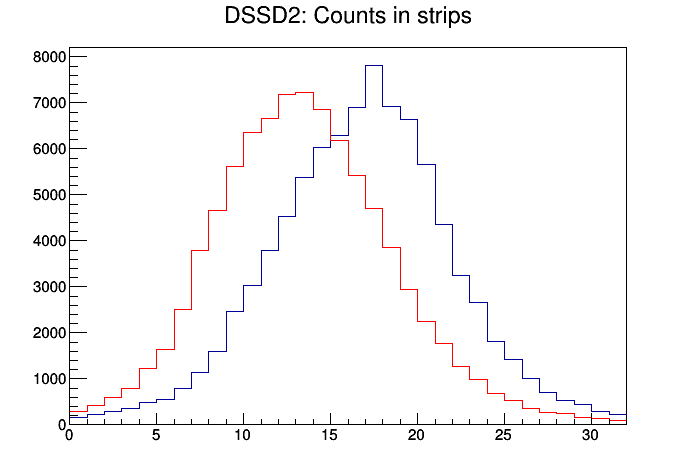

18 14


In [6]:
THStack *hs2 = new THStack("hs2","DSSD2: Counts in strips");
tree->Draw("d2xs>>h2xs(32,0,32)","d2xhit==1 && d2yhit==1");
tree->Draw("d2ys>>h2ys(32,0,32)","d2xhit==1 && d2yhit==1");
h2ys->SetLineColor(2);
hs2->Add(h2xs);
hs2->Add(h2ys);
xsmax[1]=h2xs->GetMaximumBin();
ysmax[1]=h2ys->GetMaximumBin();
cout<<xsmax[1]<<" "<<ysmax[1]<<endl;
hs2->Draw("nostack");
c1->Draw();

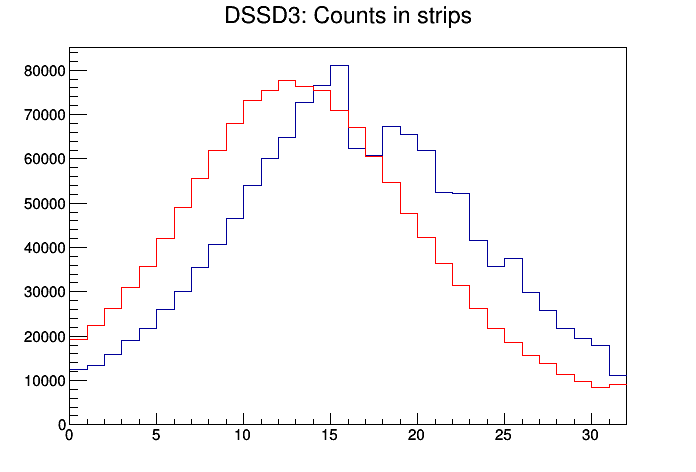

16 13


In [7]:
THStack *hs3 = new THStack("hs3","DSSD3: Counts in strips");
tree->Draw("d3xs>>h3xs(32,0,32)","d3xhit==1 && d3yhit==1");
tree->Draw("d3ys>>h3ys(32,0,32)","d3xhit==1 && d3yhit==1");
h3ys->SetLineColor(2);
hs3->Add(h3xs);
hs3->Add(h3ys);
xsmax[2]=h3xs->GetMaximumBin();
ysmax[2]=h3ys->GetMaximumBin();
cout<<xsmax[2]<<" "<<ysmax[2]<<endl;
hs3->Draw("nostack");
c1->Draw();

In [8]:
TString stree,hname;
TString scutall;
TGraph *grx[32],*grxc[32];
TH2F *hg[32];
TF1 *fp1= new TF1("fp1","pol1",200,8000);
fp1->SetLineColor(kGray);

In [9]:
int idet=1;//1,2,3
int ys=ysmax[idet-1];
int xs=xsmax[idet-1];
int xmax[32];
double par[2];
TString sdx,sdy,sdx1,sdy1;


In [10]:
for(int ix=0;ix<32;ix++) {
    sdx.Form("d%dx[%d]",idet,ix);//d1x[ix]
    sdy.Form("d%dy[%d]",idet,ys);//d1y[ys]    
    stree.Form("%s:%s>>hg%02d(1000,0,8000,1000,0,8000)",sdy.Data(),sdx.Data(),ix);
    //cut for proper x-y range for a selected DSSD
    TString scut;
    //cut for crosstalk veto
    scut.Form("%s>200 && %s>200",sdx.Data(),sdy.Data());
    for(int i=ix-1;i<=ix+1;i+=2) {
        TString stmp;
        if(i>-1 && i<32)  {
            sdx1.Form("d%dx[%d]",idet,i);//d1x[i]
            stmp.Form("%s<100",sdx1.Data()); 
            scut += " && " + stmp;
        }
    }
    for(int i=ys-1;i<=ys+1;i+=2) {
        TString stmp;
        if(i>-1 && i<32)  {
            sdy1.Form("d%dy[%d]",idet,i);//d1y[i]
            stmp.Form("%s<100",sdy1.Data()); 
            scut += " && " + stmp;
        }
    }
    TString scutxyup, scutxylow;
    fup[idet-1]->GetParameters(&par[0]);
    scutxyup.Form("%s<%f*%s+%f",sdy.Data(),par[1],sdx.Data(),par[0]);
    flow[idet-1]->GetParameters(&par[0]);
    scutxylow.Form("%s>%f*%s+%f",sdy.Data(),par[1],sdx.Data(),par[0]);
    
    scutall= scut + "&&" +scutxyup + "&&" + scutxylow;
    tree->Draw(stree.Data(),scutall.Data());
    hname.Form("hg%02d",ix);
    hg[ix]=(TH2F*) gROOT->FindObject(hname);
    grx[ix] = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
    //make new TGraphs grxc[xs] with refined cut range.
    grxc[ix]=new TGraph;
    int ng=0;
    xmax[ix]=0;
    if(grx[ix]->GetN()>20) {
        grx[ix]->Fit(fp1,"Q ROB");
        fp1->GetParameters(&par[0]);
        for(int k=0; k<grx[ix]->GetN(); k++) {
            double x=grx[ix]->GetX()[k];
            double y=grx[ix]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grxc[ix]->SetPoint(ng,x,y);
                if(x>xmax[ix]) xmax[ix]=x;
                ng++;
            }            
        }
    }

    cout<<"dssd = "<<idet<<"     , ix = "<<ix<<" ,     Nc="<<grxc[ix]->GetN()<<" ,     xmax= "<<xmax[ix]<<endl;
}


dssd = 1     , ix = 0 ,     Nc=43 ,     xmax= 4853
dssd = 1     , ix = 1 ,     Nc=54 ,     xmax= 3766
dssd = 1     , ix = 2 ,     Nc=77 ,     xmax= 5661
dssd = 1     , ix = 3 ,     Nc=119 ,     xmax= 5402
dssd = 1     , ix = 4 ,     Nc=139 ,     xmax= 6266
dssd = 1     , ix = 5 ,     Nc=167 ,     xmax= 5158
dssd = 1     , ix = 6 ,     Nc=180 ,     xmax= 5606
dssd = 1     , ix = 7 ,     Nc=193 ,     xmax= 5727
dssd = 1     , ix = 8 ,     Nc=210 ,     xmax= 6062
dssd = 1     , ix = 9 ,     Nc=262 ,     xmax= 6529
dssd = 1     , ix = 10 ,     Nc=233 ,     xmax= 5071
dssd = 1     , ix = 11 ,     Nc=278 ,     xmax= 5545
dssd = 1     , ix = 12 ,     Nc=346 ,     xmax= 7531
dssd = 1     , ix = 13 ,     Nc=298 ,     xmax= 5209
dssd = 1     , ix = 14 ,     Nc=291 ,     xmax= 4383
dssd = 1     , ix = 15 ,     Nc=456 ,     xmax= 7249
dssd = 1     , ix = 16 ,     Nc=650 ,     xmax= 7370
dssd = 1     , ix = 17 ,     Nc=653 ,     xmax= 7324
dssd = 1     , ix = 18 ,     Nc=536 ,     xmax= 6086
dssd =

456

****************************************
Minimizer is Linear / Robust
Chi2                      =  7.01178e+06
NDf                       =          454
p0                        =     -16.2109
p1                        =      1.04854


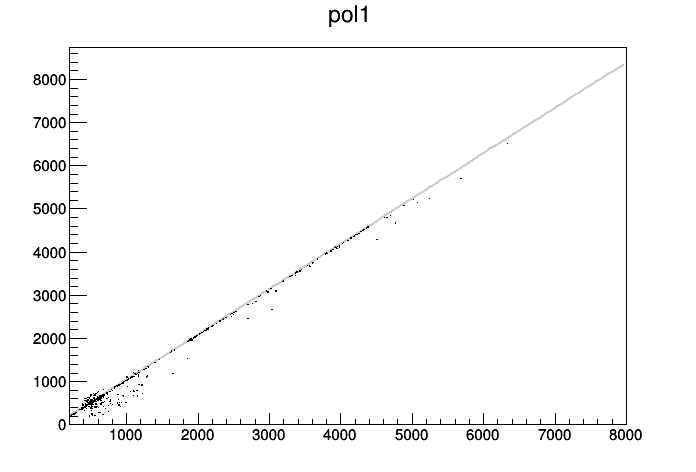

In [11]:
int ix=14;
cout<<grx[ix]->GetN()<<endl;
if(grx[ix]->GetN()>20) {
    grx[ix]->Fit(fp1,"ROB");
    fp1->Draw();
  //  grx[ix]->Draw("AP same");
   // grxc[ix]->Draw("AP same");
    hg[ix]->Draw("same");
    c1->SetLogz();
    c1->Draw();
}


### Write histogram in subdirectory
https://root-forum.cern.ch/t/write-histogram-in-subdirectory/27072/7 

### 以ysmax为基准，刻度x面的条，得到刻度系数

In [12]:
TF1 *fp2= new TF1("fp2","pol2",200,8000);
TString hresname,head,out;
double par2[32][3], chi2ndf[32];
ofstream fout("cali1x.txt");
TFile *hfout=new TFile("hfout.root","RECREATE");
TDirectory *herrdir,*hstatdir;
hresdir=hfout->mkdir("hres");
hstatdir=hfout->mkdir("hstat");
TH2F *hres[32];
TH1F *hcount=new TH1F("hcount","Count vs strip for DSSD1", 32,0,32);
TH1F *hmaxval=new TH1F("hmaxval","maxVal vs strip for DSSD1", 32,0,32);
TH1F *hchi2ndf=new TH1F("hchi2ndf","chi2/ndf vs strip for DSSD1",32,0,32);

In [13]:
head.Form("%4s%9s%11s%20s        %16s","ix","p0","p1","p2","chi2/ndf");
cout<<head<<endl;
fout<<head<<endl;
for(int ix=0;ix<32;ix++) {
    grxc[ix]->Fit(fp2,"Q");
    fp2->GetParameters(&par2[ix][0]);
    //histogram
    hcount->Fill(ix,grxc[ix]->GetN());
    hmaxval->Fill(ix,xmax[ix]);
    chi2ndf[ix]=fp2->GetChisquare()/fp2->GetNDF();
    hchi2ndf->Fill(ix,chi2ndf[ix]);
    hcount->SetDirectory(hstatdir);
    hmaxval->SetDirectory(hstatdir);
    hchi2ndf->SetDirectory(hstatdir);
    hcount->Sumw2(0);
    hmaxval->Sumw2(0);
    hchi2ndf->Sumw2(0);
    hresname.Form("hres%02d",ix);
    hres[ix] = new TH2F(hresname,hresname,100,-50,50,1000,200,8000);
    for(int j = 0;j < grx[ix]->GetN(); j++){
        double x=grx[ix]->GetX()[j];
        double y=grx[ix]->GetY()[j];
        x = y-(par2[ix][0]+par2[ix][1]*x+par2[ix][2]*x*x);
        hres[ix]->Fill(x,y);
    }
    hres[ix]->SetDirectory(hresdir);
    out.Form("%4d%9.2f%11.6f%20e%16.2f"  ,ix  ,par2[ix][0]  ,par2[ix][1]  ,par2[ix][2]  ,chi2ndf[ix]);
    cout<<out<<endl;
    fout<<out<<endl;
}
hfout->Write();
hfout->Close();
fout.close();

  ix       p0         p1                  p2                chi2/ndf
   0    -8.00   1.022636       -1.299673e-07           24.53
   1   -10.56   1.027315        2.782369e-07           12.83
   2   -16.48   1.029782        2.390428e-07           17.38
   3   -10.69   1.012073        1.111279e-07           14.62
   4   -15.38   1.019664        6.882978e-07           18.03
   5    -9.84   1.038848        2.638494e-07           26.24
   6   -12.56   1.032342        6.356983e-07           29.75
   7    -9.58   1.031020        2.611411e-07           23.73
   8   -14.15   1.028126        3.805377e-07           19.69
   9    -8.11   1.024700        5.906869e-07           30.45
  10   -12.58   1.042791        2.525735e-08           27.98
  11    -9.69   1.036236        3.597965e-07           30.66
  12   -13.21   1.013273        6.698478e-07           31.45
  13   -10.28   1.043169       -2.933718e-07           26.15
  14   -15.92   1.046937        4.088991e-07           26.66
  15    -5.33   

In [14]:
TFile *fout1=new TFile("hfout.root");

In [15]:
fout1->ls();

TFile**		hfout.root	
 TFile*		hfout.root	
  KEY: TDirectoryFile	hres;1	hres
  KEY: TDirectoryFile	hstat;1	hstat


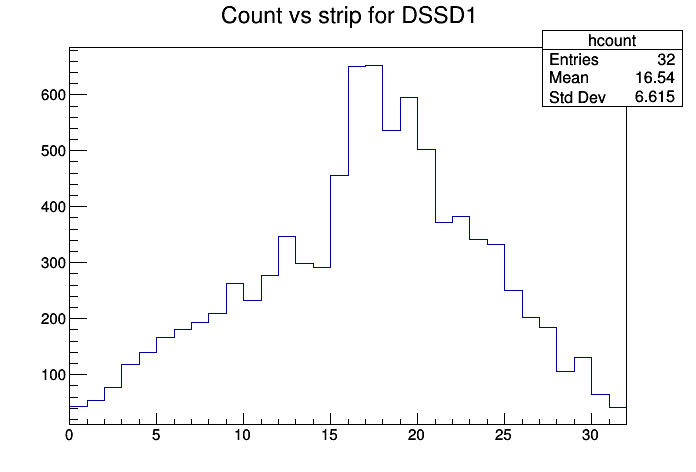

In [16]:
TH1F *hcout=(TH1F*) fout1->Get("hstat/hcount");
hcout->Draw();
c1->Draw();

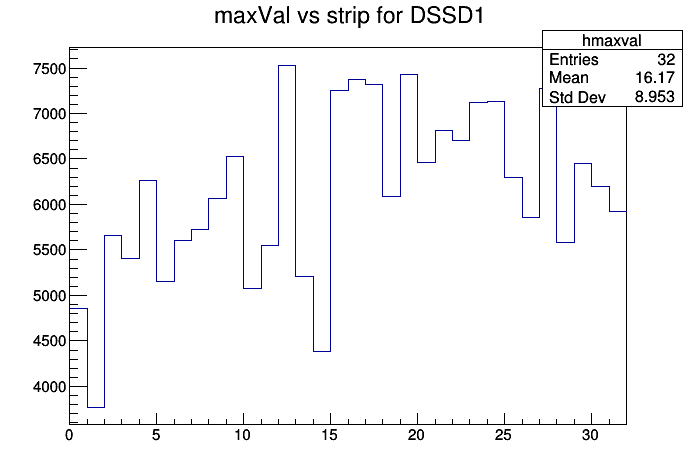

In [17]:
TH1F *hmaxv=(TH1F*) fout1->Get("hstat/hmaxval");
hmaxv->Draw();
c1->Draw();